In [4]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [5]:
dataset = MNIST(root="data/", download=True)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...


../torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Done!


In [6]:
len(dataset)

60000

In [7]:
test_dataset = MNIST(root="data/", train=False)
len(test_dataset)

10000

In [8]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x12A8C94D0>, 5)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

label: 5


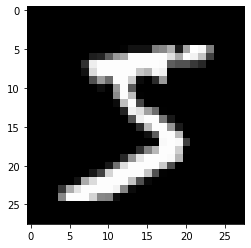

In [17]:
image, label = dataset[0]
plt.imshow(image, cmap="gray")
print("label:", label)

label: 3


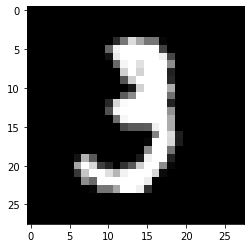

In [18]:
image, label = dataset[10]
plt.imshow(image, cmap="gray")
print("label:", label)

In [19]:
import torchvision.transforms as transforms

In [20]:
dataset = MNIST(root="data/", train=True, transform=transforms.ToTensor())

In [23]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


## Training

In [36]:
n = 60000
# 20% validation set
val_pct = 0.2

n_val = int(val_pct*n)
idxs = np.random.permutation(n_val)
print(idxs)

[5881 3175 6394 ... 8463 5982 8214]


In [39]:
import numpy as np

def split_indices(n, val_pct):
    n_val = int(val_pct*n)
    idxs = np.random.permutation(n)
    return idxs[n_val:], idxs[:n_val]

In [40]:
train_indices, val_indices = split_indices(len(dataset), 0.2)

### inbuilt function for random sampling

In [42]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [44]:
# 100 images per batch
batch_size = 100

# training sampler and data loader
# dataloader only takes indices provided in the sampler kawrg
train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset, batch_size, sampler=train_sampler)

# validation sampler and data loader
val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset, batch_size, sampler = val_sampler)

# Model

In [46]:
import torch.nn as nn

input_size = 28*28
num_classes = 10
model = nn.Linear(input_size, num_classes)

In [55]:
# custom class creation for flattening of image data into single long vector
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
model = MnistModel()

In [64]:
# example output - 2 images with different class weights -> weight of 0,1,2,3,.. etc
for images, labels in train_loader:
    outputs = model(images)
    print(outputs.shape)
    print(outputs[0:2])
    break

torch.Size([100, 10])
tensor([[-0.1884,  0.0941, -0.0831, -0.1226, -0.3056, -0.0501,  0.3097,  0.2246,
          0.2928,  0.1072],
        [-0.2033, -0.0739,  0.1079,  0.1064,  0.0123,  0.1384,  0.0650,  0.3292,
         -0.0273,  0.1553]], grad_fn=<SliceBackward>)


In [65]:
# softmax function for conversion of nums to numbers between 0 & 1
#  S(yi) = e ^ (yi) / sum(e ^ (yi))
import torch.nn.functional as F

In [66]:
probs = F.softmax(outputs, dim=1)

In [73]:
probs[0:2]

tensor([[0.0790, 0.1048, 0.0877, 0.0843, 0.0702, 0.0907, 0.1300, 0.1194, 0.1278,
         0.1061],
        [0.0760, 0.0866, 0.1038, 0.1037, 0.0943, 0.1070, 0.0995, 0.1295, 0.0907,
         0.1089]], grad_fn=<SliceBackward>)

In [75]:
max_probs, preds = torch.max(probs, dim=1)

In [76]:
print(preds)
print(max_probs)

tensor([6, 7, 5, 7, 7, 7, 3, 7, 7, 7, 7, 0, 7, 6, 7, 7, 7, 7, 7, 7, 0, 7, 7, 7,
        6, 6, 6, 6, 7, 7, 9, 7, 7, 8, 7, 9, 6, 6, 7, 5, 6, 7, 9, 6, 7, 6, 5, 3,
        6, 7, 7, 5, 7, 6, 7, 7, 7, 7, 6, 9, 7, 7, 6, 0, 7, 6, 7, 5, 7, 7, 7, 7,
        7, 6, 6, 7, 6, 7, 7, 7, 7, 3, 7, 7, 7, 6, 7, 6, 7, 7, 7, 0, 7, 6, 3, 7,
        6, 6, 7, 7])
tensor([0.1300, 0.1295, 0.1451, 0.1379, 0.1132, 0.1380, 0.1183, 0.1716, 0.1489,
        0.1374, 0.1411, 0.1268, 0.1328, 0.1425, 0.1214, 0.1636, 0.1353, 0.1392,
        0.1638, 0.1515, 0.1227, 0.1309, 0.1197, 0.1242, 0.1252, 0.1555, 0.1207,
        0.1306, 0.1463, 0.1390, 0.1285, 0.1478, 0.1628, 0.1349, 0.1242, 0.1290,
        0.1341, 0.1516, 0.1582, 0.1114, 0.1426, 0.1464, 0.1436, 0.1434, 0.1219,
        0.1484, 0.1192, 0.1229, 0.1383, 0.1385, 0.1289, 0.1294, 0.1304, 0.1296,
        0.1352, 0.1332, 0.1163, 0.1620, 0.1187, 0.1305, 0.1327, 0.1474, 0.1351,
        0.1260, 0.1386, 0.1390, 0.1226, 0.1255, 0.1492, 0.1583, 0.1248, 0.1556,
        0.1187, 0.1

In [88]:
def accuracy(outputs,labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.sum(preds==labels).item() / len(preds)

In [78]:
accuracy(preds, labels)

0.09

## Loss function
### Cross entropy is commonly used loss function for classification problems

In [81]:
# D(y', y) = - sum(yi * ln(yi'))
loss_fn = F.cross_entropy

In [84]:
# F.cross_entropy also performs softmax internally

In [82]:
loss = loss_fn(outputs, labels)

In [83]:
print(loss)

tensor(2.3337, grad_fn=<NllLossBackward>)


## Optimizer

In [85]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [86]:
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None):
    preds = model(xb)
    loss = loss_func(preds,yb)
    
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()
        
    metric_result = None
    if metric is not None:
        metric_result = metric(preds, yb)
    return loss.item(), len(xb), metric_result

In [87]:
def evaluate(model, loss_fn, valid_dl, metric=None):
    with torch.no_grad():
        #pass each batch through the model
        results = [loss_batch(model, loss_fn, xb, yb, metric=metric) for xb, yb, in valid_dl]
        #separate loss, counts, metrics
        losses, nums, metrics = zip(*results)
        #total size of dataset
        total = np.sum(nums)
        #avg loss across batches
        avg_loss = np.sum(np.multiply(losses, nums)) / total
        avg_metric = None
        if metric is not None:
            avg_metric = np.sum(np.multiply(metrics, nums)) / total
    return avg_loss, total, avg_metric

In [92]:
val_loss, total, val_acc = evaluate(model, loss_fn, val_loader, metric=accuracy)

In [93]:
print(val_loss, total, val_acc)

2.3289644837379457 12000 0.10308333333333333


In [94]:
def fit(epochs, model, loss_fn, opt, train_dl, valid_dl, metric=None):
    for epoch in range(epochs):
        #Training
        for xb, yb in train_dl:
            loss,_,_ = loss_batch(model, loss_fn, xb,yb,opt)
        #Evaluation
        result = evaluate(model, loss_fn, valid_dl, metric)
        val_loss, total, val_metric = result
        
        if metric is None:
            print('Epoch [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, epochs, val_loss))
        else:
            print('Epoch [{}/{}], Loss: {:.4f}, {}: {:.4f}'
                  .format(epoch+1, epochs, val_loss, metric.__name__, val_metric))

In [95]:
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [96]:
fit(5, model, loss_fn, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 1.8625, accuracy: 0.6832
Epoch [2/5], Loss: 1.5643, accuracy: 0.7573
Epoch [3/5], Loss: 1.3548, accuracy: 0.7917
Epoch [4/5], Loss: 1.2038, accuracy: 0.8101
Epoch [5/5], Loss: 1.0917, accuracy: 0.8208


In [97]:
fit(5, model, loss_fn, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 1.0055, accuracy: 0.8286
Epoch [2/5], Loss: 0.9377, accuracy: 0.8346
Epoch [3/5], Loss: 0.8828, accuracy: 0.8395
Epoch [4/5], Loss: 0.8375, accuracy: 0.8431
Epoch [5/5], Loss: 0.7994, accuracy: 0.8461


In [99]:
test_dataset = MNIST(root="data/", train=False, transform=transforms.ToTensor())

7


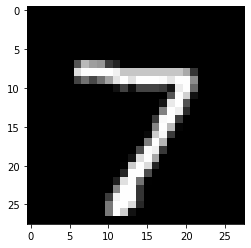

In [101]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap="gray")
print(label)

In [103]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [104]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

In [105]:
img, label = test_dataset[0]

In [108]:
print(f"Prediction: {predict_image(img,model)}, Actual: {label} ")

Prediction: 7, Actual: 7 


In [109]:
img, label = test_dataset[10]
print(f"Prediction: {predict_image(img,model)}, Actual: {label} ")

Prediction: 0, Actual: 0 


In [110]:
img, label = test_dataset[1]
print(f"Prediction: {predict_image(img,model)}, Actual: {label} ")

Prediction: 2, Actual: 2 


In [111]:
img, label = test_dataset[1839]
print(f"Prediction: {predict_image(img,model)}, Actual: {label} ")

Prediction: 8, Actual: 2 


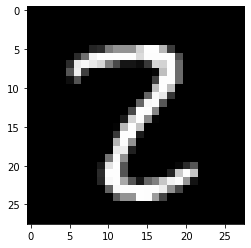

In [112]:
plt.imshow(img[0], cmap="gray")

In [113]:
test_loader = DataLoader(test_dataset, batch_size=200)
test_loss,total,test_acc = evaluate(model, loss_fn, test_loader, metric=accuracy)
print(f"Loss: {test_loss}, Accuracy: {test_acc}")

Loss: 0.7889431715011597, Accuracy: 0.8499


In [114]:
torch.save(model.state_dict(), "mnist-logistic.pth")

In [115]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0026, -0.0181,  0.0148,  ...,  0.0239, -0.0264,  0.0176],
                      [-0.0163,  0.0128, -0.0182,  ...,  0.0055,  0.0059, -0.0056],
                      [-0.0354,  0.0249, -0.0179,  ...,  0.0083,  0.0248, -0.0127],
                      ...,
                      [-0.0071,  0.0017, -0.0230,  ..., -0.0350,  0.0195, -0.0253],
                      [ 0.0139,  0.0322, -0.0074,  ...,  0.0086,  0.0323, -0.0109],
                      [-0.0203, -0.0056, -0.0330,  ...,  0.0347, -0.0296,  0.0023]])),
             ('linear.bias',
              tensor([-0.0636,  0.0677, -0.0332, -0.0118,  0.0417,  0.0471, -0.0083,  0.0626,
                      -0.0639,  0.0248]))])